In [ ]:
# !pip install roboflow

# from roboflow import Roboflow
# rf = Roboflow(api_key="******************")
# project = rf.workspace("road-crack-project").project("crack-detection-0pbhh")
# dataset = project.version(7).download("yolov7")


In [ ]:
import zipfile
import requests
import cv2
import matplotlib.pyplot as plt
import glob 
import random
import os

In [ ]:
#os.makedirs('datasets', exist_ok=True)

In [ ]:
#%cd datasets

In [6]:
# Function to convert bounding boxes in YOLO format to xmin, ymin, xmax, ymax.
def yolo2bbox(bboxes):
    xmin, ymin = bboxes[0]-bboxes[2]/2, bboxes[1]-bboxes[3]/2
    xmax, ymax = bboxes[0]+bboxes[2]/2, bboxes[1]+bboxes[3]/2
    return xmin, ymin, xmax, ymax

In [7]:
def plot_box(image, bboxes, labels):
    # Need the image height and width to denormalize
    # the bounding box coordinates
    h, w, _ = image.shape
    for box_num, box in enumerate(bboxes):
        x1, y1, x2, y2 = yolo2bbox(box)
        # Denormalize the coordinates.
        xmin = int(x1*w)
        ymin = int(y1*h)
        xmax = int(x2*w)
        ymax = int(y2*h)

        thickness = max(2, int(w/275))
                
        cv2.rectangle(
            image, 
            (xmin, ymin), (xmax, ymax),
            color=(0, 0, 255),
            thickness=thickness
        )
    return image

In [8]:
# Function to plot images with the bounding boxes.
def plot(image_paths, label_paths, num_samples):
    all_images = []
    all_images.extend(glob.glob(image_paths+'/*.jpg'))
    all_images.extend(glob.glob(image_paths+'/*.JPG'))
    
    all_images.sort()

    num_images = len(all_images)
    
    plt.figure(figsize=(15, 12))
    for i in range(num_samples):
        j = random.randint(0,num_images-1)
        image_name = all_images[j]
        image_name = '.'.join(image_name.split(os.path.sep)[-1].split('.')[:-1])
        image = cv2.imread(all_images[j])
        with open(os.path.join(label_paths, image_name+'.txt'), 'r') as f:
            bboxes = []
            labels = []
            label_lines = f.readlines()
            for label_line in label_lines:
                label = label_line[0]
                bbox_string = label_line[2:]
                x_c, y_c, w, h = bbox_string.split(' ')
                x_c = float(x_c)
                y_c = float(y_c)
                w = float(w)
                h = float(h)
                bboxes.append([x_c, y_c, w, h])
                labels.append(label)
        result_image = plot_box(image, bboxes, labels)
        plt.subplot(2, 2, i+1)
        plt.imshow(result_image[:, :, ::-1])
        plt.axis('off')
    plt.subplots_adjust(wspace=1)
    plt.tight_layout()
    plt.show()

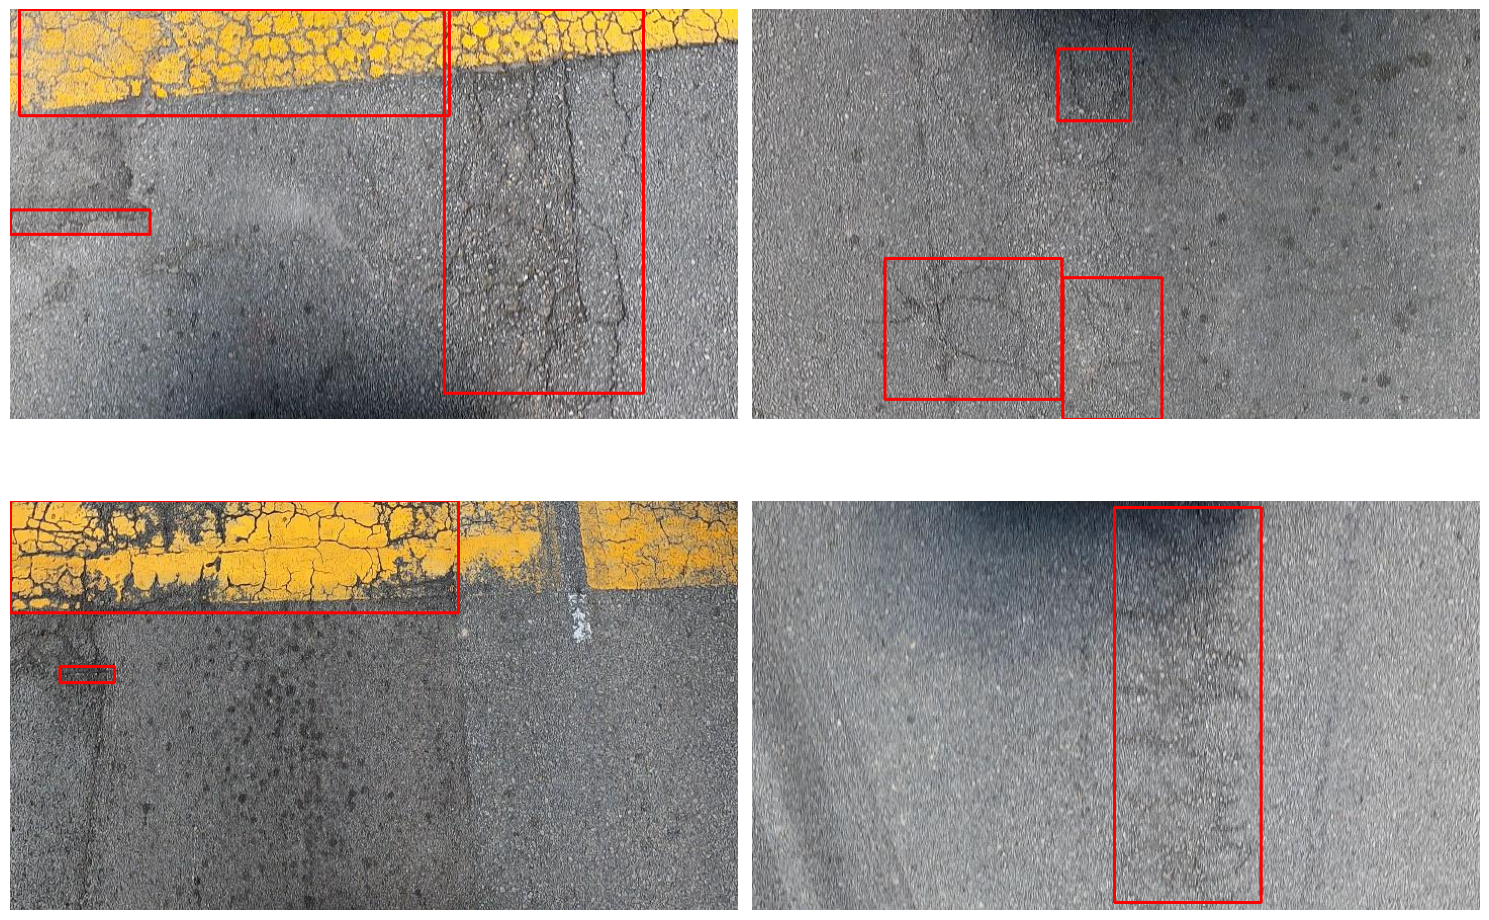

In [9]:
# Visualize a few training images.
plot(
    image_paths='My-road-crack-dataset-7/train/images/', 
    label_paths='My-road-crack-dataset-7/train/labels/',
    num_samples=4,
)

Import Yolo model 

In [ ]:
# %%writefile crack_v8.yaml
# path: 'My-road-crack-dataset-7/'
# train: 'train/images'
# val: 'valid/images'

# # class names
# names: 
#   0: 'crack'

In [2]:
from ultralytics import YOLO
from ultralytics import RTDETR

# Load a COCO-pretrained RT-DETR-l model
#model = RTDETR('rtdetr-l.pt')
model = YOLO('yolov5m6u.pt')
model.info()

YOLOv5m6u summary: 442 layers, 41222064 parameters, 0 gradients, 65.7 GFLOPs


(442, 41222064, 0, 65.7300608)

In [7]:
model.train(data="/home/aayushivt/ICT_project/YOLO/crack_data.yaml", epochs=300,batch=4,imgsz=640, name='yolov5m6u_')  # train the model

New https://pypi.org/project/ultralytics/8.0.216 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.175 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla V100-SXM3-32GB, 32501MiB)
engine/trainer: task=detect, mode=train, model=yolov5m6u.pt, data=/home/aayushivt/ICT_project/YOLO/crack_data.yaml, epochs=300, patience=50, batch=4, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=yolov5m6u_, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_widt

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7f6b762665f0>
fitness: 0.3259563962220825
keys: ['metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)']
maps: array([    0.33244,     0.14941,     0.47567,     0.24091])
names: {0: 'Crocodile', 1: 'Longitudinal', 2: 'Pothole', 3: 'Transverse'}
plot: True
results_dict: {'metrics/precision(B)': 0.7331006890956089, 'metrics/recall(B)': 0.5222236234071409, 'metrics/mAP50(B)': 0.5630836935688861, 'metrics/mAP50-95(B)': 0.29960891873910434, 'fitness': 0.3259563962220825}
save_dir: PosixPath('runs/detect/yolov5m6u_3')
speed: {'preprocess': 0.12610598308284107, 'inference': 7.581693370167803, 'loss': 0.0014595869110851753, 'postprocess': 0.7678473868021151}

In [ ]:
from ultralytics import YOLO

model = YOLO('/home/aayushivt/ICT_project/YOLO/runs/detect/yolov5m6u_3/weights/best.pt')  # load a custom model(best.pt)

# Validate the model
metrics = model.val()  # no arguments needed, dataset and settings remembered
metrics.box.map    # map50-95
metrics.box.map50  # map50
metrics.box.map75  # map75
metrics.box.maps   # a list contains map50-95 of each category

In [ ]:
model = YOLO('/home/aayushivt/ICT_project/YOLO/runs/detect/yolov5m6u_3/weights/best.pt')  # load a custom model(best.pt)

# Validate the model
metrics = model.val()
metrics.box.map50 

In [ ]:
!yolo task=detect \
mode=predict \
model=runs/detect/yolov5m6u_3/weights/best.pt \
source=ICT_project/YOLO/My-road-crack-dataset-7/valid/images \
imgsz=640 \
name=Yolov5 \
hide_labels=True

In [ ]:
# Plot and visualize images in a 2x2 grid.
def visualize(result_dir, num_samples=4):
    """
    Function accepts a list of images and plots
    them in a 2x2 grid.
    """
    plt.figure(figsize=(20, 12))
    image_names = glob.glob(os.path.join(result_dir, '*.jpg'))
    random.shuffle(image_names)
    for i, image_name in enumerate(image_names):
        image = plt.imread(image_name)
        plt.subplot(2, 2, i+1)
        plt.imshow(image)
        plt.axis('off')
        if i == num_samples-1:
            break
    plt.tight_layout()
    plt.show()

In [ ]:
visualize('runs/detect/predict2/')

In [ ]:
#After visualization write all values for graph

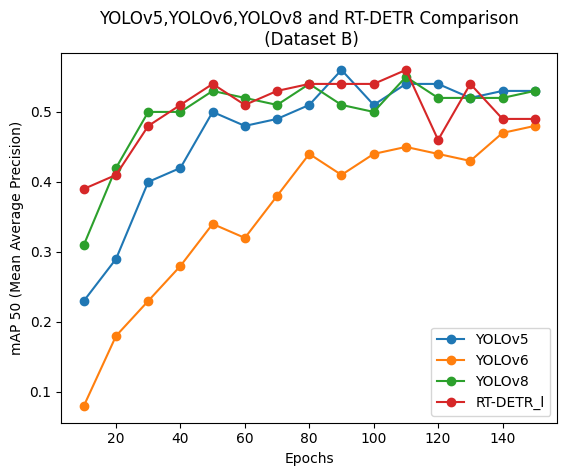

In [21]:
#########################YOLOv5,YOLOv6 and YOLOv8 Comparison#######################################33

import matplotlib.pyplot as plt

# Example data (replace this with your actual data)
epochs = [10, 20, 30, 40, 50, 60 ,70 ,80 ,90 ,100,110,120,130,140,150]
mAP_scores_yolov5 = [0.23, 0.29, 0.40, 0.42, 0.50,0.48,0.49,0.51,0.56,0.51,0.54,0.54,0.52,0.53,0.53 ] 
mAP_scores_yolov6 = [0.08, 0.18, 0.23, 0.28, 0.34,0.32 , 0.38 , 0.44 , 0.41 ,0.44 ,0.45 ,0.44 ,0.43 ,0.47, 0.48 ]
mAP_scores_yolov8 = [0.31, 0.42, 0.50, 0.50, 0.53,0.52,0.51,0.54,0.51,0.50 ,0.55,
                       0.52,0.52,0.52,0.53]
mAP_scores_rtdetr =[0.39, 0.41, 0.48, 0.51,0.54,0.51, 0.53,0.54,0.54,0.54,0.56,0.46,0.54,0.49,0.49 ]
# Plotting the line graph
plt.plot(epochs, mAP_scores_yolov5, marker='o', label='YOLOv5')
plt.plot(epochs, mAP_scores_yolov6, marker='o', label='YOLOv6')
plt.plot(epochs, mAP_scores_yolov8, marker='o', label='YOLOv8')
plt.plot(epochs, mAP_scores_rtdetr, marker='o', label='RT-DETR_l')
# Adding labels and title
plt.xlabel('Epochs')
plt.ylabel('mAP 50 (Mean Average Precision)')
plt.title('YOLOv5,YOLOv6,YOLOv8 and RT-DETR Comparison\n (Dataset B)')
plt.legend() 

# Show the plot
plt.grid(False)
plt.show()


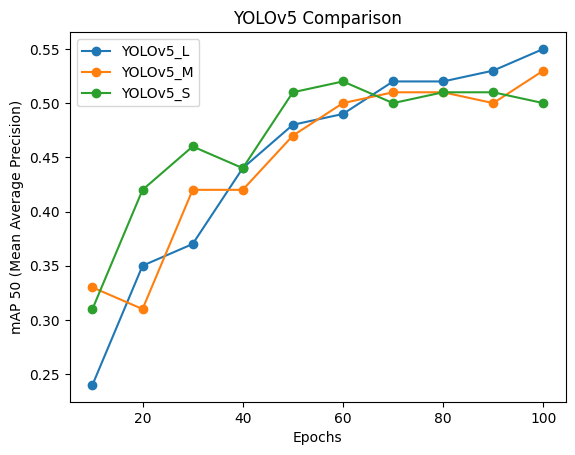

In [18]:
import matplotlib.pyplot as plt

epochs = [10, 20, 30, 40, 50 ,60 ,70 ,80 ,90 ,100,110,120,130,140] #,150,160,170,180,190,200]
mAP_scores_yolov5_L = [0.24, 0.35, 0.37, 0.44, 0.48,0.49,0.52,0.52,0.53,0.55]
mAP_scores_yolov5_M = [0.23, 0.29, 0.40, 0.42, 0.50,0.48,0.49,0.51,0.56,0.51,0.54,0.54,0.52,0.53,0.53 ] 
mAP_scores_yolov5_S =[0.31 ,0.42 , 0.46 , 0.44 ,0.51 ,0.52 , 0.50 , 0.51 ,0.51 , 0.50 ] #,0.51 ,0.53 ,0.54, 0.53 , 0.54 ,0.55, 0.54, 0.53, 0.55, 0.56 ]
plt.plot(epochs, mAP_scores_yolov5_L, marker='o', label='YOLOv5_L')
plt.plot(epochs, mAP_scores_yolov5_M, marker='o', label='YOLOv5_M')
plt.plot(epochs, mAP_scores_yolov5_S, marker='o', label='YOLOv5_S')
# Adding labels and title
plt.xlabel('Epochs')
plt.ylabel('mAP 50 (Mean Average Precision)')
plt.title('YOLOv5 Comparison')
plt.legend()  # Show legend

# Show the plot
plt.grid(False)
plt.show()


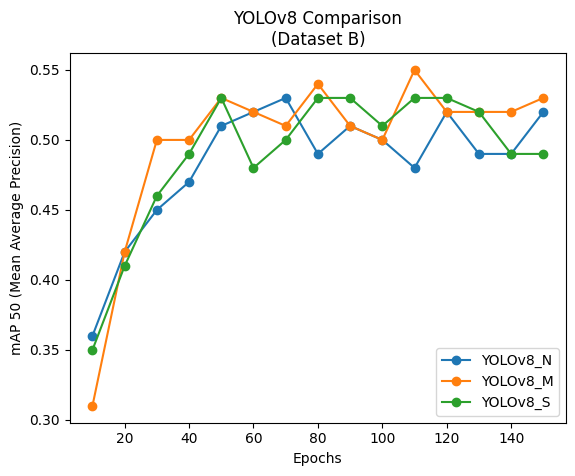

In [20]:
import matplotlib.pyplot as plt

epochs = [10, 20, 30, 40, 50 ,60 ,70 ,80 ,90 ,100,110,120,130,140,150]  #,160,170,180,190,200]
mAP_scores_yolov8_N = [0.36, 0.42, 0.45, 0.47, 0.51, 0.52, 0.53, 0.49, 0.51, 0.50, 0.48, 0.52,0.49,0.49, 0.52 ]
mAP_scores_yolov8_M = [0.31, 0.42, 0.50, 0.50, 0.53,0.52,0.51,0.54,0.51,0.50 ,0.55,
                       0.52,0.52,0.52,0.53]
mAP_scores_yolov8_S =[0.35 ,0.41 , 0.46 , 0.49 ,0.53 ,0.48 , 0.50 , 0.53 ,0.53 , 0.51,
                      0.53 ,0.53 ,0.52, 0.49 , 0.49 ]

mAP_scores_yolov8_L =[0.26 ,0.37 , 0.46 , 0.48 ,0.47 ,0.50 , 0.49 , 0.53 ,0.52 , 0.47, 0.51, 0.48]
plt.plot(epochs, mAP_scores_yolov8_N, marker='o', label='YOLOv8_N')
plt.plot(epochs, mAP_scores_yolov8_M, marker='o', label='YOLOv8_M')
plt.plot(epochs, mAP_scores_yolov8_S, marker='o', label='YOLOv8_S')
# Adding labels and title
plt.xlabel('Epochs')
plt.ylabel('mAP 50 (Mean Average Precision)')
plt.title('YOLOv8 Comparison\n(Dataset B)')
plt.legend()  # Show legend

# Show the plot
plt.grid(False)
plt.show()